In [3283]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# get data

In [3284]:
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv',na_values = '?')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

#  clean/fix data

### drop time since first/last std diagnosis columns

In [3286]:
print(df['Biopsy'].value_counts())
print(df['Citology'].value_counts())
print(df['Hinselmann'].value_counts())
print(df['Schiller'].value_counts())

Biopsy
0    803
1     55
Name: count, dtype: int64
Citology
0    814
1     44
Name: count, dtype: int64
Hinselmann
0    823
1     35
Name: count, dtype: int64
Schiller
0    784
1     74
Name: count, dtype: int64


In [3287]:
drop_columns = ['STDs: Time since last diagnosis','STDs: Time since first diagnosis','Citology','Hinselmann','Schiller','Dx:Cancer','Dx']
df['Biopsy'] =df['Dx:Cancer']
df = df.drop(columns = drop_columns)
# df = df.drop('STDs: Time since first diagnosis',axis = 1)
# df = df.drop('STDs: Time since last diagnosis',axis = 1)
print(df['Biopsy'].value_counts())
print(df.to_string())

Biopsy
0    840
1     18
Name: count, dtype: int64


     Age  Number of sexual partners  First sexual intercourse  Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  IUD (years)  STDs  STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  Dx:CIN  Dx:HPV  Biopsy
0     18                        4.0                      15.0                 1.0     0.0        0.000000             0.000000                      0.0                         0.000000  0.0         0.00   0.0            0.0                  0.0                           0.0                          0.0                                 0.0            0.0                               0.0                  0.0                         0.0        0.0       0.0    

### impute missing values as mean

In [3288]:
df = df.fillna(df.mean())
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [3289]:
# split independent variables and dependent variable

vars = df.drop('Biopsy',axis = 1)
result = df['Biopsy']
result.value_counts()

Biopsy
0    840
1     18
Name: count, dtype: int64

# prepare data for training/testing

### split data into training data and testing data

In [3290]:
from sklearn.model_selection import train_test_split

In [3291]:
vars_train,vars_test,result_train,result_test = train_test_split(vars,result,test_size = 0.2,random_state = 1)

In [3292]:
vars_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV
408,17,2.000000,15.0,2.0,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0,0,0
207,26,3.000000,18.0,2.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0
61,35,3.000000,20.0,5.0,1.0,19.0,19.0,1.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0
455,18,1.000000,16.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0
331,27,1.000000,15.0,4.0,0.0,0.0,0.0,1.000000,2.282201,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,15,2.000000,14.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0
767,15,2.000000,13.0,1.0,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0,0,0
72,34,2.000000,21.0,2.0,0.0,0.0,0.0,1.000000,0.330000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0
235,25,2.000000,17.0,1.0,0.0,0.0,0.0,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0


In [3293]:
vars_test

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV
255,25,2.0,18.0,2.0,0.0,0.0,0.0,1.0,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
56,35,5.0,15.0,4.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
479,28,1.0,24.0,2.0,0.0,0.0,0.0,1.0,0.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
84,36,2.0,15.0,3.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
589,41,3.0,18.0,4.0,0.0,0.0,0.0,1.0,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,16,3.0,14.0,2.0,0.0,0.0,0.0,1.0,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
202,27,2.0,13.0,2.0,1.0,7.0,1.4,1.0,3.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
841,23,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
506,36,1.0,22.0,4.0,1.0,16.0,4.8,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [3294]:
result_train

408    0
207    0
61     0
455    0
331    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Biopsy, Length: 686, dtype: int64

In [3295]:
result_test

255    0
56     0
479    0
84     0
589    0
      ..
543    0
202    0
841    0
506    0
766    0
Name: Biopsy, Length: 172, dtype: int64

### undersample majority

In [3296]:
import imblearn
from collections import Counter
from numpy import where


In [3297]:
result_train.value_counts()

Biopsy
0    674
1     12
Name: count, dtype: int64

In [3298]:
# undersample = imblearn.under_sampling.CondensedNearestNeighbour()
# vars_train,result_train = undersample.fit_resample(vars_train,result_train)
# result_train.value_counts()

In [3299]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy=.4)
vars_train,result_train = over.fit_resample(vars_train,result_train)
result_train.value_counts()

Biopsy
0    674
1    269
Name: count, dtype: int64

In [3300]:
# under = RandomUnderSampler(sampling_strategy=.5)
# vars_train,result_train = under.fit_resample(vars_train,result_train)
# result_train.value_counts()

### standardize scale of data

In [3301]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [3302]:
vars_train_scaled = scaler.fit_transform(vars_train)
vars_test_scaled = scaler.transform(vars_test)

In [3303]:
vars_train_scaled

array([[-1.36073893, -0.43868036, -0.88343667, ..., -0.30378754,
        -0.09249946, -0.5581611 ],
       [-0.22518423,  0.26230332,  0.24135152, ..., -0.30378754,
        -0.09249946, -0.5581611 ],
       [ 0.91037047,  0.26230332,  0.99121031, ..., -0.30378754,
        -0.09249946, -0.5581611 ],
       ...,
       [ 0.153334  , -0.43868036,  0.24135152, ..., -0.30378754,
        -0.09249946,  1.79159745],
       [ 1.2888887 , -0.43868036, -0.88343667, ..., -0.30378754,
        -0.09249946,  1.79159745],
       [-0.09901149, -0.43868036, -1.25836607, ..., -0.30378754,
        -0.09249946,  1.79159745]])

In [3304]:
vars_test_scaled

array([[-0.35135697, -0.43868036,  0.24135152, ..., -0.30378754,
        -0.09249946, -0.5581611 ],
       [ 0.91037047,  1.66427068, -0.88343667, ..., -0.30378754,
        -0.09249946, -0.5581611 ],
       [ 0.02716126, -1.13966403,  2.4909279 , ..., -0.30378754,
        -0.09249946, -0.5581611 ],
       ...,
       [-0.60370246, -0.43868036, -0.88343667, ..., -0.30378754,
        -0.09249946, -0.5581611 ],
       [ 1.03654321, -1.13966403,  1.7410691 , ...,  2.98899007,
        -0.09249946, -0.5581611 ],
       [-0.85604795, -1.13966403, -1.25836607, ..., -0.30378754,
        -0.09249946, -0.5581611 ]])

# train model

# train model with xgboost

In [3305]:
import xgboost as xgb

In [3306]:
xgb_model = xgb.XGBClassifier(max_weight = 50000000,num_estimators = 2500,scale_pos_weight = 1).fit(vars_train,result_train)

/home/roger/Desktop/My GitHub/Cervical-Cancer-Risk-Classification-Model/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [22:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_weight", "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [3307]:
print(str(xgb_model.score(vars_train_scaled,result_train)) + " accurate on training data")

0.9162248144220573 accurate on training data


In [3308]:
print(str(xgb_model.score(vars_test_scaled,result_test)) + " accurate on testing data")

0.9883720930232558 accurate on testing data


# evaluate new model

In [3309]:
from sklearn.metrics import classification_report



In [3310]:

xgb_result_predict = xgb_model.predict(vars_test)
print(classification_report(result_test,xgb_result_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00         6

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



In [3311]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from numpy import mean

In [3312]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(xgb_model, vars, result, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.5f' % mean(scores))

Text(0.5, 80.7222222222222, 'actual')

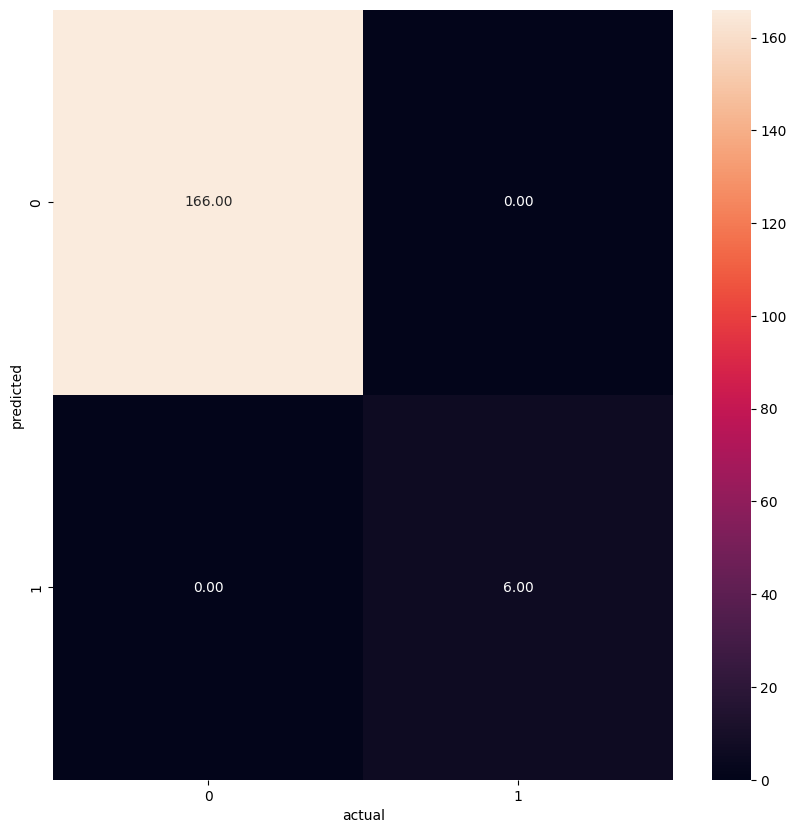

In [3313]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(xgb_result_predict,result_test) 
sns.heatmap(cm,annot = True,fmt = '.2f')
plt.ylabel('predicted')
plt.xlabel('actual')

### save model

In [3314]:
xgb_model.save_model("model.json")

<Axes: >

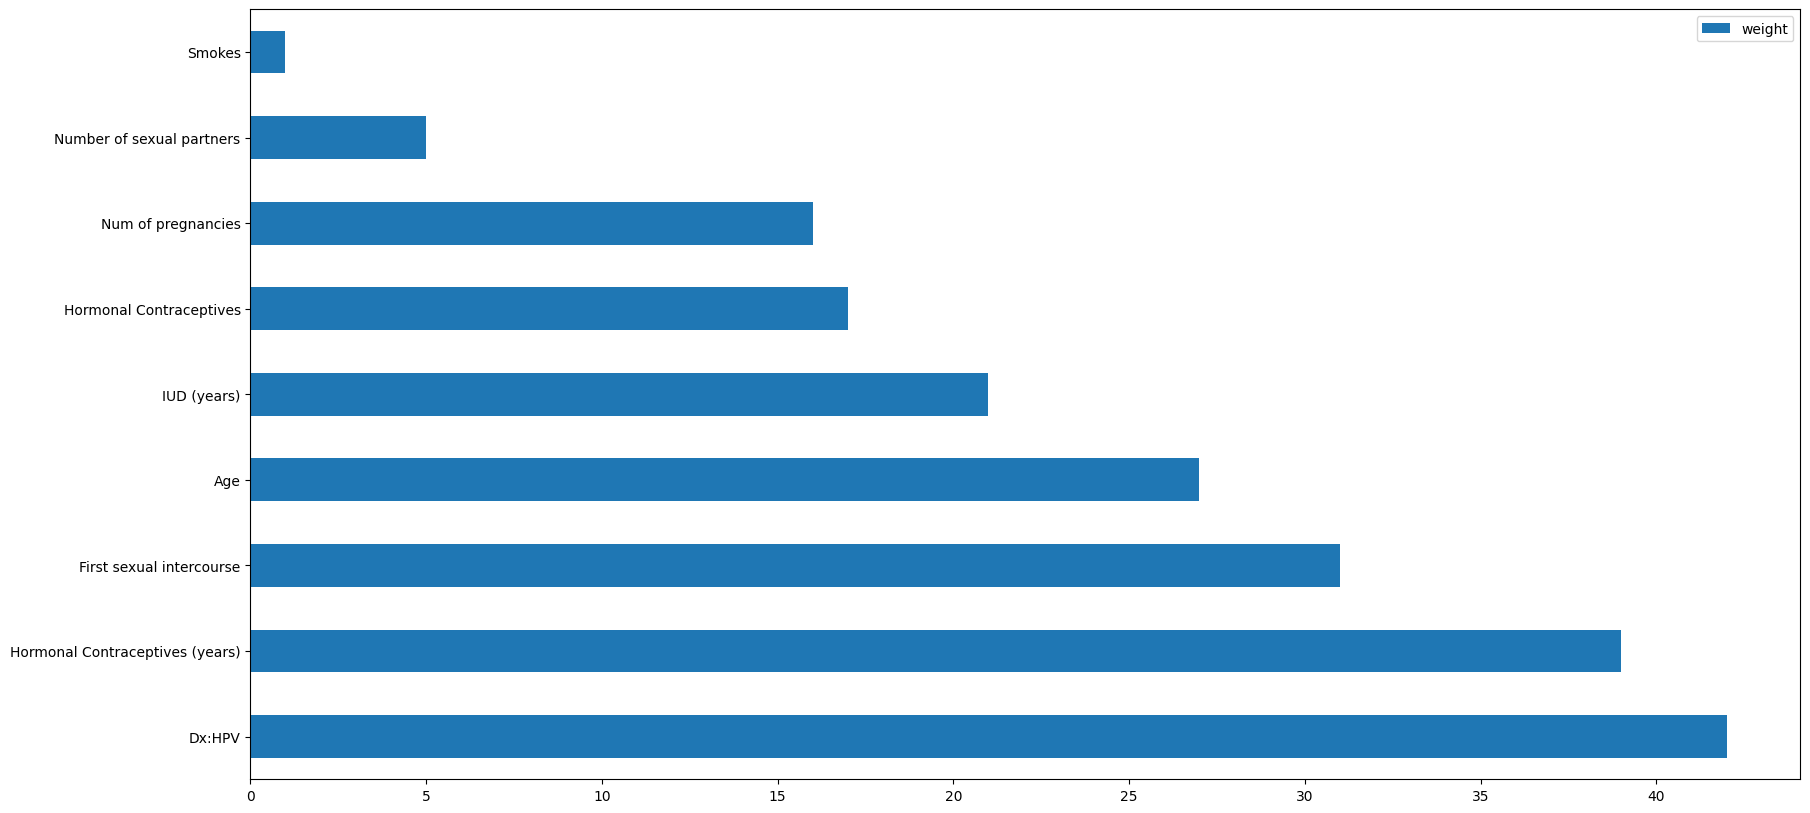

In [3315]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["weight"]).sort_values(by = "weight", ascending=False)
data.nlargest(40, columns="weight").plot(kind='barh', figsize = (20,10)) ## plot top 40 features